In [3]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [4]:
target1 = pd.read_csv('J032933.97-004801.0.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

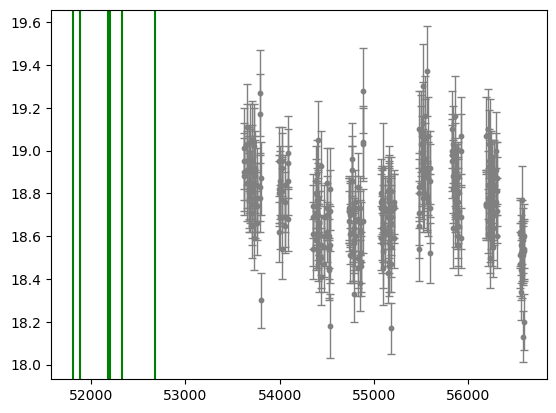

In [5]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 52672, color ='g')	
plt.axvline(x=51810, color ='g')
plt.axvline(x=51879, color ='g')
plt.axvline(x=52179, color ='g')
plt.axvline(x=52199, color ='g')
plt.axvline(x=52326, color ='g')


In [6]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

326

In [7]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.007060000003548339,
 0.007059999996272381,
 0.0070000000050640665,
 23.95669999999518,
 0.007030000000668224,
 0.007250000002386514,
 0.007030000000668224,
 19.945919999998296,
 0.004820000001927838,
 0.004990000001271255,
 0.004909999996016268,
 4.952360000002955,
 0.008709999994607642,
 0.008720000005268957,
 0.008730000001378357,
 10.04878999999346,
 0.005600000004051253,
 0.005619999996270053,
 0.005610000000160653,
 17.79500000000553,
 0.006419999997888226,
 0.0064399999973829836,
 0.006450000000768341,
 6.016560000003665,
 0.006900000000314321,
 0.006909999996423721,
 0.006919999999809079,
 19.965210000002116,
 0.007959999995364342,
 0.007980000002135057,
 0.008000000001629815,
 10.956059999996796,
 0.008020000001124572,
 0.008050000004004687,
 0.00804000000061933,
 22.900770000000193,
 0.008089999995718244,
 0.008050000004004687,
 0.008029999997233972,
 27.94991999999911,
 0.006430000001273584,
 0.0064399999973829836,
 0.006420000005164184,
 7.972709999994549,
 0.008700000005

In [8]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[45, 67, 111, 151, 193, 226, 262, 305]

In [9]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[46, 22, 44, 40, 42, 33, 36, 43, 21]

In [10]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [11]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
28,J032933.97-004801.0,1001019041395,18.90,0.18,52.39166,-0.80020,53626.40216,0
29,J032933.97-004801.0,1001019041395,18.88,0.18,52.39153,-0.80025,53626.40922,0
30,J032933.97-004801.0,1001019041395,18.95,0.18,52.39148,-0.80031,53626.41628,0
31,J032933.97-004801.0,1001019041395,19.01,0.19,52.39153,-0.80021,53626.42328,0
20,J032933.97-004801.0,1001019041395,19.03,0.19,52.39158,-0.80020,53650.37998,0
...,...,...,...,...,...,...,...,...
321,J032933.97-004801.0,1001019041395,18.51,0.14,52.39148,-0.80019,56577.49573,0
322,J032933.97-004801.0,1001019041395,18.53,0.14,52.39145,-0.80029,56593.44488,0
323,J032933.97-004801.0,1001019041395,18.54,0.14,52.39166,-0.80035,56593.44992,0
324,J032933.97-004801.0,1001019041395,18.60,0.15,52.39146,-0.80013,56593.45497,0


In [12]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53799.10255

In [13]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

54090.2427

In [14]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54532.11216

In [15]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54881.1569

In [16]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55212.18944

In [17]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55589.18039

In [18]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55926.23616

In [19]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56310.13955

In [21]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56593.46002

In [ ]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [22]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [ ]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [23]:
med

[18.85, 18.82, 18.64, 18.66, 18.69, 18.89, 18.85, 18.775, 18.525]

In [24]:
centerMJD

[53706.1169371111,
 54030.83165190475,
 54437.47648372093,
 54802.30315025641,
 55141.6523202439,
 55530.035469375,
 55869.31249371429,
 56246.385948571435,
 56570.658801000005]

In [25]:
medMJD


[53703.21393,
 54025.34421,
 54419.24033,
 54789.25097,
 55159.31895,
 55530.229725,
 55868.34723,
 56238.43991,
 56570.4102]

In [26]:
medopflux


[0.00010471285480508985,
 0.0001076465213629835,
 0.00012705741052085288,
 0.0001247383514242933,
 0.00012133888504649663,
 0.00010092956940270574,
 0.00010471285480508985,
 0.00011220303519780376,
 0.0001412552522909504]

In [27]:
st = 53626
#start of observations

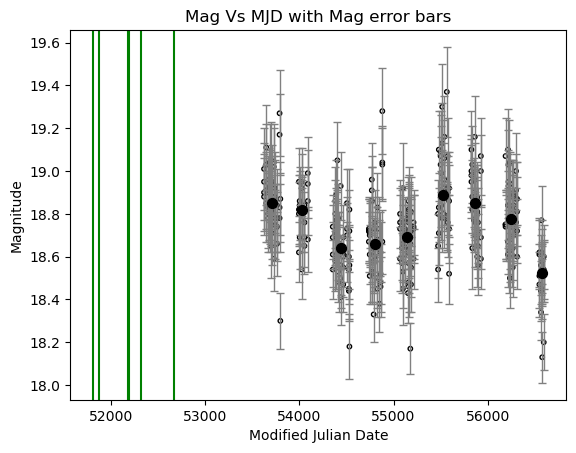

In [28]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 52672, color ='g')	
plt.axvline(x=51810, color ='g')
plt.axvline(x=51879, color ='g')
plt.axvline(x=52179, color ='g')
plt.axvline(x=52199, color ='g')
plt.axvline(x=52326, color ='g')	

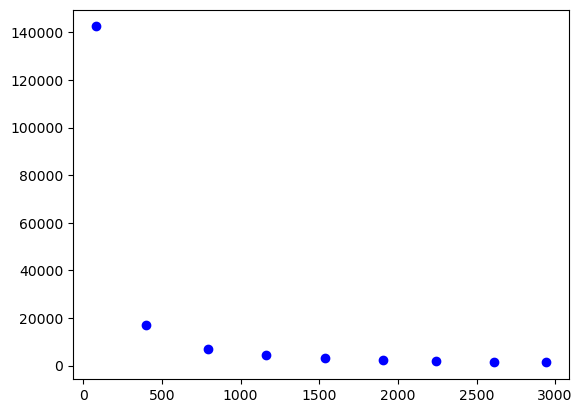

In [29]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [30]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [31]:
popt3

array([-1.23416131e+02,  2.84650221e-04,  1.42404908e+02])

In [32]:
pcov3

array([[ 6.54205951e+11,  1.50620133e+06, -6.54206941e+11],
       [ 1.50620133e+06,  3.46778029e+00, -1.50620361e+06],
       [-6.54206941e+11, -1.50620361e+06,  6.54207931e+11]])

In [33]:
 np.sqrt(np.diag(pcov3))

array([8.08829989e+05, 1.86219770e+00, 8.08831213e+05])

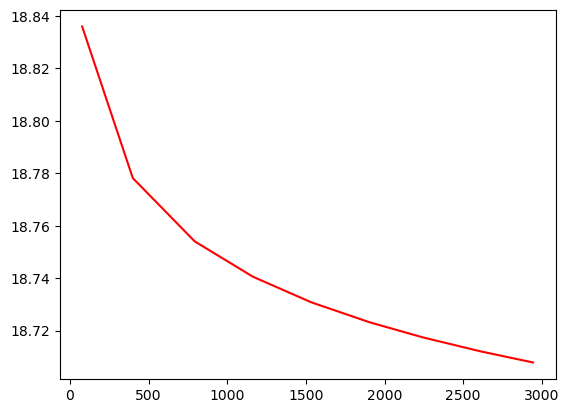

In [34]:
plt.plot(x, f(x,*popt3), 'r-')

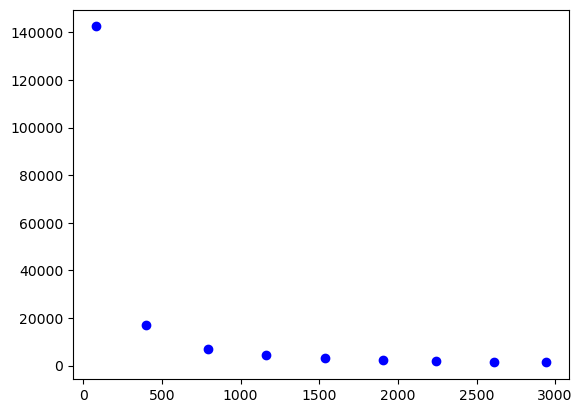

In [35]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [38]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag, maxfev =2000 )

In [39]:
popt4

array([-2.14988562e+02,  1.27364245e-04,  2.33927918e+02])

In [40]:
pcov4

array([[ 8.27702893e+10,  4.95025505e+04, -8.27703027e+10],
       [ 4.95025505e+04,  2.96060655e-02, -4.95025585e+04],
       [-8.27703027e+10, -4.95025585e+04,  8.27703160e+10]])

In [41]:
 np.sqrt(np.diag(pcov4))

array([2.87698261e+05, 1.72064132e-01, 2.87698307e+05])

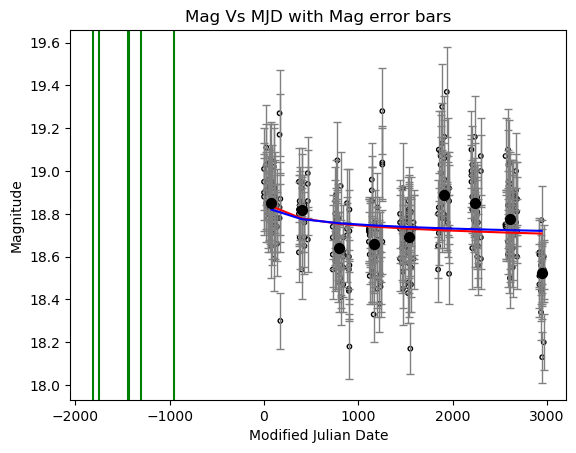

In [42]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 52672-st, color ='g')	
plt.axvline(x=51810-st, color ='g')
plt.axvline(x=51879-st, color ='g')
plt.axvline(x=52179-st, color ='g')
plt.axvline(x=52199-st, color ='g')
plt.axvline(x=52326-st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



Text(0.5, 1.0, 'Flux Density Vs MJD with Flux error bars')

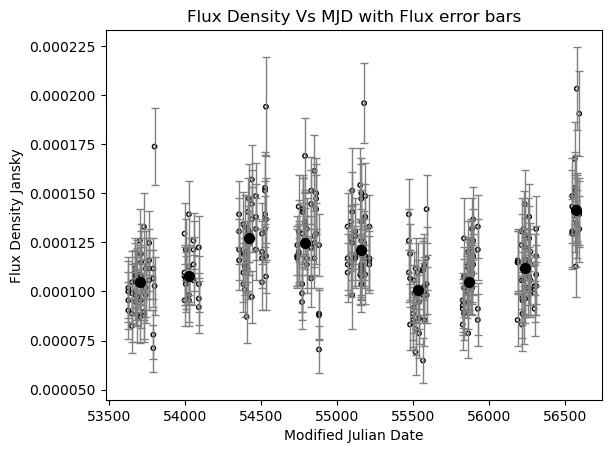

In [43]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

#plt.axvline(x=  , color ='g')	
#plt.axvline(x= , color ='g')

In [44]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [45]:
popt2

array([ 0.01172166,  0.00033414, -0.01163284])

In [46]:
pcov2

array([[ 5.25449427e+03, -1.49473901e+02, -5.25450509e+03],
       [-1.49473901e+02,  4.25206438e+00,  1.49474209e+02],
       [-5.25450509e+03,  1.49474209e+02,  5.25451591e+03]])

In [47]:
 np.sqrt(np.diag(pcov2))

array([72.48789051,  2.06205344, 72.48803979])

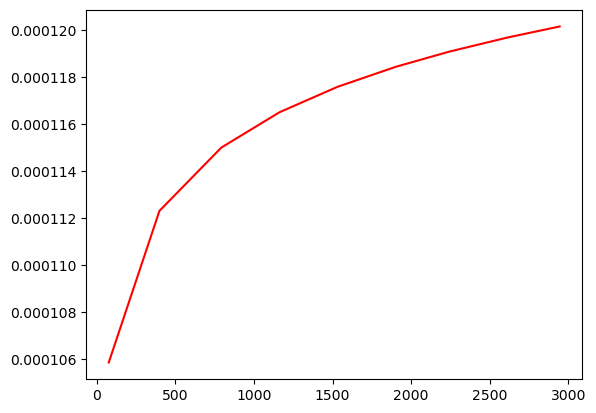

In [48]:
plt.plot(x, f(x,*popt2), 'r-')

In [49]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [50]:
popt1

array([ 0.02135126,  0.0001408 , -0.02125543])

In [51]:
pcov1

array([[ 6.82475107e+02, -4.58396715e+00, -6.82475237e+02],
       [-4.58396715e+00,  3.07890436e-02,  4.58396802e+00],
       [-6.82475237e+02,  4.58396802e+00,  6.82475366e+02]])

In [52]:
 np.sqrt(np.diag(pcov1))

array([26.12422453,  0.17546807, 26.12422948])

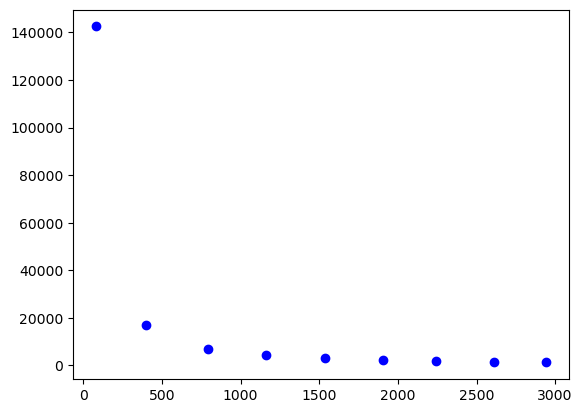

In [53]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


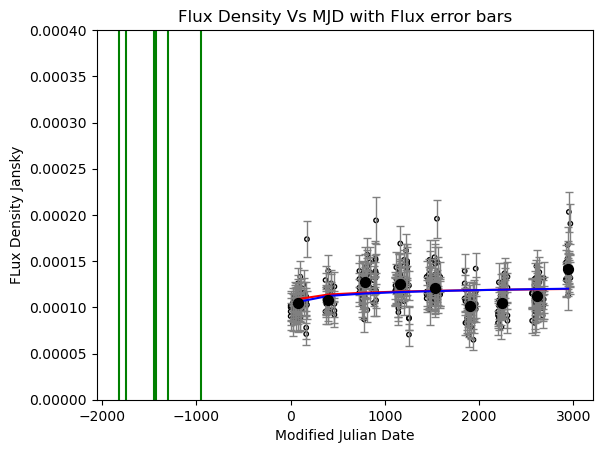

In [54]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
plt.ylim(0, 0.0004)

plt.axvline(x= 52672-st, color ='g')	
plt.axvline(x=51810-st, color ='g')
plt.axvline(x=51879-st, color ='g')
plt.axvline(x=52179-st, color ='g')
plt.axvline(x=52199-st, color ='g')
plt.axvline(x=52326-st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [55]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [56]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



NameError: name 'func' is not defined

In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
